In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from ast import literal_eval
from collections import Counter

In [62]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile_Clustered_with_categorical.csv")
user_profile.head()

,Unnamed: 0,Unnamed: 0.1,event_source.hash,ONNET_OUTGOING_Categorical,ONNET_OUTGOING_Scaled,ONNET_OUTGOING_Outlier,ONNET_INCOMING_Categorical,ONNET_INCOMING_Scaled,ONNET_INCOMING_Outlier,OFFNET_OUTGOING_Categorical,...,OFFNET_Overall_Categorical,IDD_Overall_Categorical,VOICE_Categorical,Play_Type,Play_Usage,Voice_Packages,Other_Packages,Household_Types,Having_Insurance,Cluster
0,0,0,00221451f705ebe26051158bb14f567a,LOW,0.009321,NO,LOW,0.017514,NO,LOW,...,LOW,NO,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO,0
1,1,1,002fb47f60400713c854b0f69ff78c0a,LOW,0.051339,NO,LOW,0.056319,NO,LOW,...,LOW,LOW,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO,0
2,2,2,00567a4a3c474aca1ce5cd6570648932,LOW,0.002404,NO,LOW,0.001374,NO,LOW,...,LOW,NO,LOW,TRIPLE_PLAY,"['VOICE_LOW', 'BB_MEDIUM', 'TV_MEDIUM']",NO,NO,NO,NO,1
3,3,3,00724ae2470df1ed0fe919800d02517d,LOW,0.003140,NO,LOW,0.002747,NO,LOW,...,LOW,NO,LOW,DOUBLE_PLAY,"['VOICE_LOW', 'BB_LOW', 'TV_NO']",NO,NO,NO,NO,2
4,4,4,007400db8afa996e788d23986739f3db,LOW,0.025755,NO,LOW,0.017857,NO,LOW,...,LOW,LOW,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO,0


In [63]:
user_profile.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1,inplace=True)

### Cluster Counts

<AxesSubplot:ylabel='Cluster'>

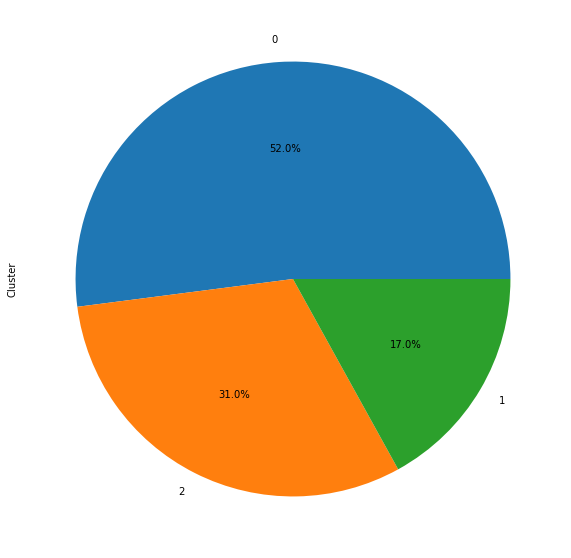

In [64]:
user_profile["Cluster"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

# Cluster analysis - Cluster 0

In [65]:
cluster_0 = user_profile[(user_profile["Cluster"]==0)]

In [66]:
cluster_0.describe()

,ONNET_OUTGOING_Scaled,ONNET_INCOMING_Scaled,OFFNET_OUTGOING_Scaled,OFFNET_INCOMING_Scaled,IDD_INCOMING_Scaled,IDD_OUTGOING_Scaled,PEO_TV_Scaled,BB_Scaled,Cluster
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.0
mean,0.090396,0.089406,0.102266,0.101678,0.037603,0.014981,0.006112,0.003899,0.0
std,0.103823,0.105735,0.118160,0.102458,0.114038,0.066942,0.038001,0.028817,0.0
min,0.001202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.013834,0.012191,0.015993,0.019370,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.049696,0.047390,0.065640,0.077136,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.137976,0.133585,0.145310,0.156561,0.014423,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,0.948718,0.884615,0.826923,0.425000,0.487847,0.0


<AxesSubplot:>

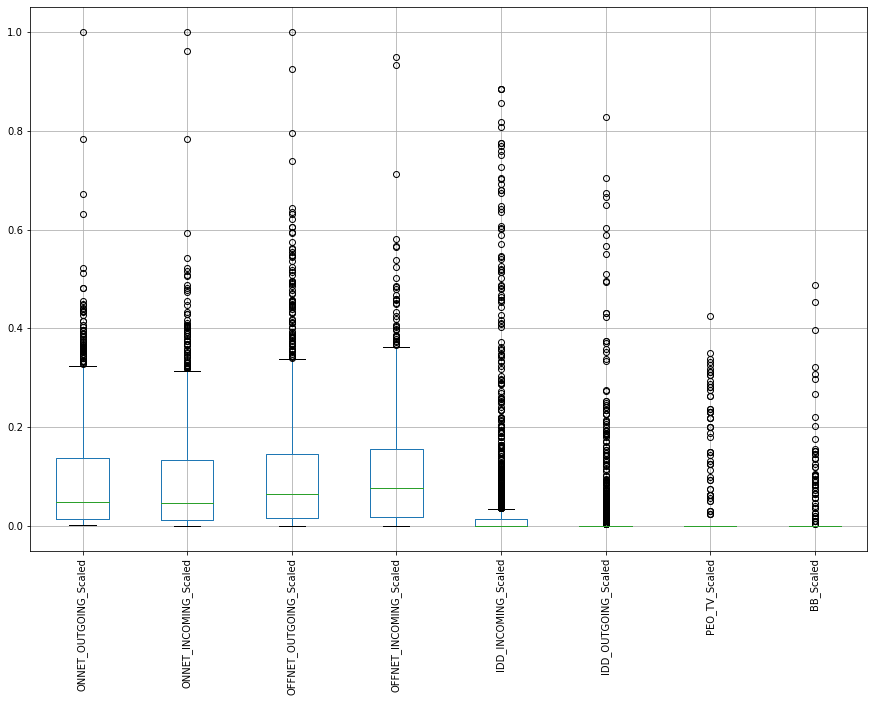

In [67]:
cluster_0.iloc[:,:34].boxplot(figsize=(15,10),rot=90)

#### Usage of randomly selected users

<AxesSubplot:>

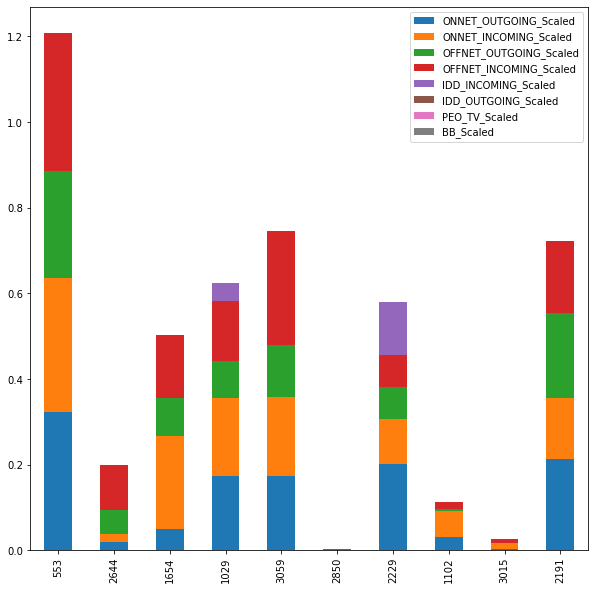

In [68]:
cluster_0.iloc[:,[2,5,8,11,14,17,21,23]].sample(n=10).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:ylabel='Density'>

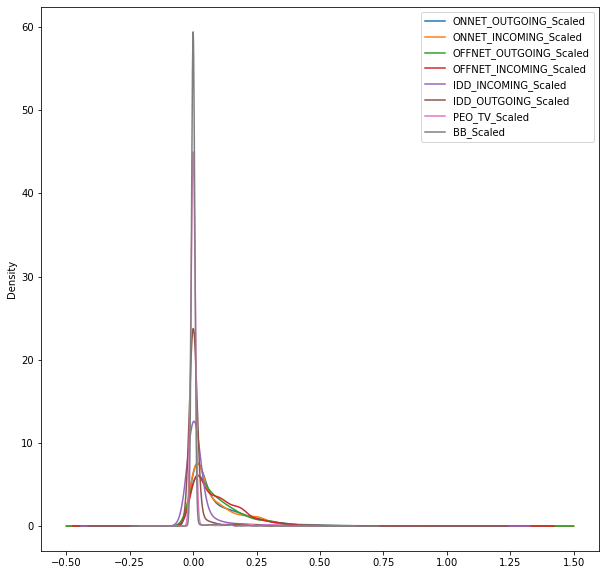

In [69]:
cluster_0.iloc[:,[2,5,8,11,14,17,21,23]].plot.kde(figsize=(10,10))

array([[<AxesSubplot:title={'center':'ONNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_OUTGOING_Scaled'}>],
       [<AxesSubplot:title={'center':'OFFNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_OUTGOING_Scaled'}>],
       [<AxesSubplot:title={'center':'PEO_TV_Scaled'}>,
        <AxesSubplot:title={'center':'BB_Scaled'}>, <AxesSubplot:>]],
      dtype=object)

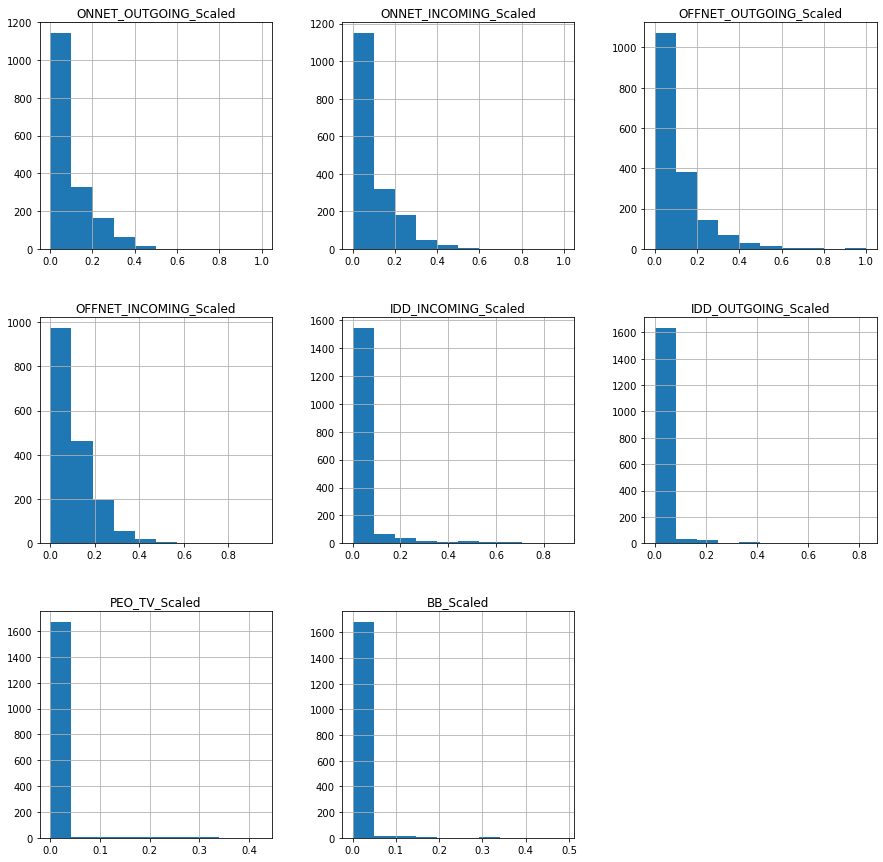

In [70]:
cluster_0.iloc[:,:34].hist(figsize=(15,15))

### Subscription Type and Usage

In [71]:
cluster_0["Play_Type"].value_counts()

SINGLE_PLAY    1663
TRIPLE_PLAY      58
Name: Play_Type, dtype: int64

In [72]:
cluster_0["Play_Usage"].value_counts()

['VOICE_LOW', 'BB_NO', 'TV_NO']            1118
['VOICE_MEDIUM', 'BB_NO', 'TV_NO']          480
['VOICE_HIGH', 'BB_NO', 'TV_NO']             65
['VOICE_LOW', 'BB_LOW', 'TV_LOW']            46
['VOICE_MEDIUM', 'BB_LOW', 'TV_LOW']          4
['VOICE_LOW', 'BB_MEDIUM', 'TV_LOW']          3
['VOICE_LOW', 'BB_LOW', 'TV_MEDIUM']          3
['VOICE_HIGH', 'BB_LOW', 'TV_LOW']            1
['VOICE_MEDIUM', 'BB_LOW', 'TV_MEDIUM']       1
Name: Play_Usage, dtype: int64

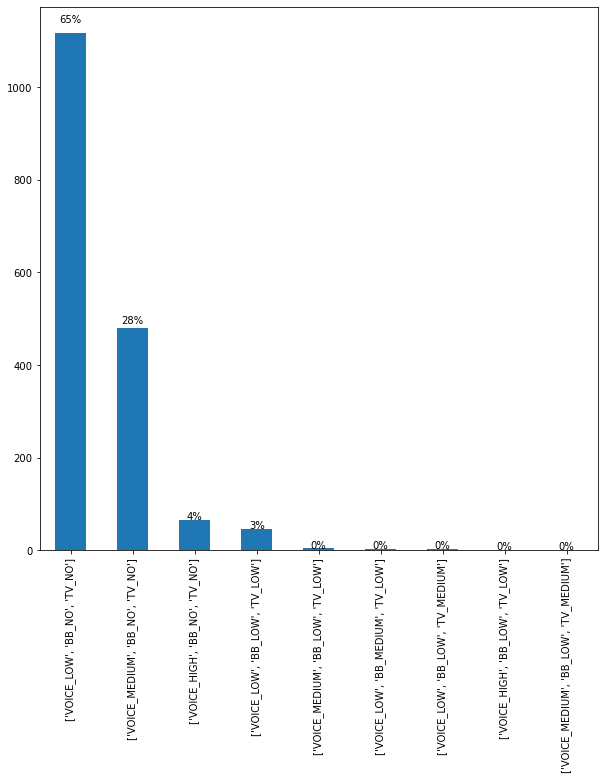

In [73]:
ax =cluster_0["Play_Usage"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Voice Calls Usage

In [74]:
cluster_0["VOICE_Categorical"].value_counts()

LOW       1170
MEDIUM     485
HIGH        66
Name: VOICE_Categorical, dtype: int64

<AxesSubplot:ylabel='VOICE_Categorical'>

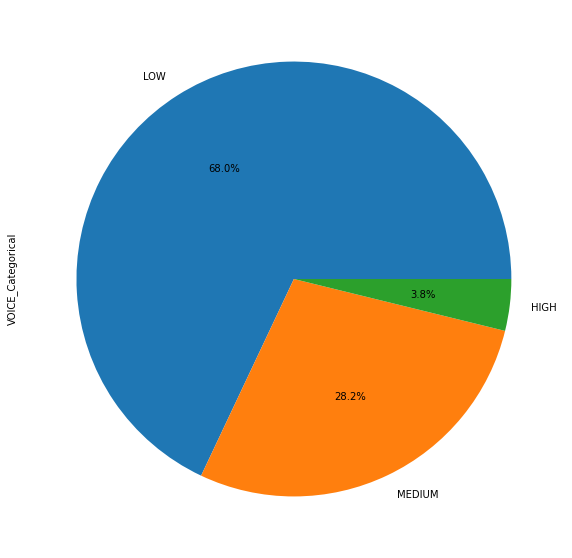

In [75]:
cluster_0["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

In [76]:
count_dict = dict(cluster_0["Voice_Packages"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
    else:
        for i in range(y):
            all_products.append(x)
all_voice_products_dict = Counter(all_products)
all_voice_products_dict

Counter({'NO': 1582,
         'V_Installment': 13,
         'V_Call Transfer Three way': 66,
         'V_Absentee service': 61,
         'V_Abbreviated Dialing': 60,
         'V_Call Forwarding': 69,
         'V_Call Waiting': 59,
         'V_Call Forwarding-Immediate': 57,
         'V_Call Forwarding-On Busy': 58,
         'V_Call Forwarding-No Answer': 58,
         'V_IDD': 47,
         'V_Hotline Service': 24,
         'V_DQ Contact Details': 48,
         'E_PeoTV_Package Transfer': 3,
         'V_Basic Phone Installment': 3,
         'V_SLT Voice Service': 22,
         'V_SLT CLI': 31,
         'V_Single VAS Bundle': 30,
         'V_Cordeless Phone - Installment': 3,
         'V_Incoming Call Transfer': 26,
         'V_Call Forwarding by time': 33,
         'V_Outgoing Call Memory': 35,
         'V_Call holding': 34,
         'V_CLI presentation in call waiting': 21,
         'V_Caller name sending': 2,
         'V_Selective call rejection': 2,
         'V_Call park': 21,
         

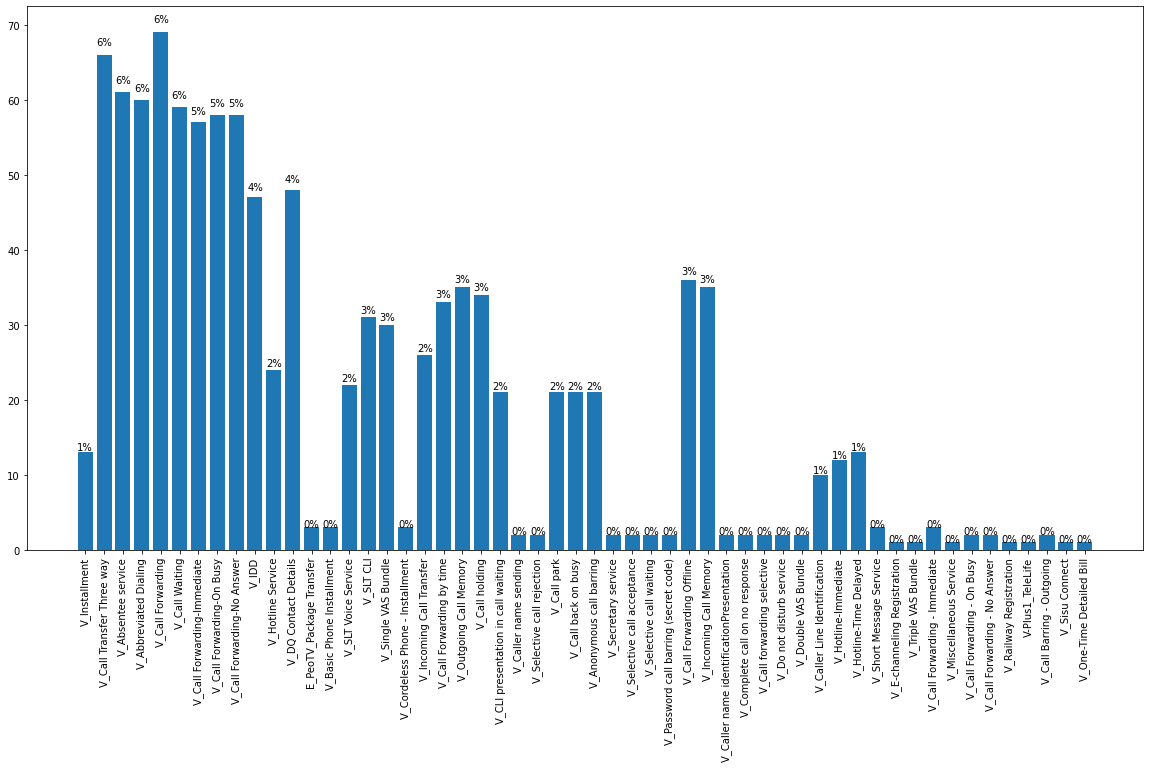

In [77]:
avp_without_no = all_voice_products_dict
avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [78]:
cluster_0["IDD_Overall_Categorical"].value_counts()

NO        1054
LOW        592
MEDIUM      38
HIGH        37
Name: IDD_Overall_Categorical, dtype: int64

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

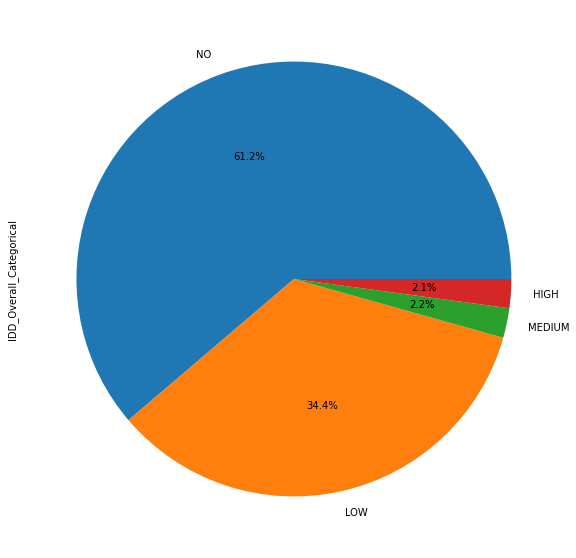

In [79]:
cluster_0["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

### PeoTV Usage

In [80]:
cluster_0["PEO_TV_Categorical"].value_counts()

NO        1663
LOW         54
MEDIUM       4
Name: PEO_TV_Categorical, dtype: int64

#### PeoTV Usage among all users in Cluster 0

<AxesSubplot:ylabel='PEO_TV_Categorical'>

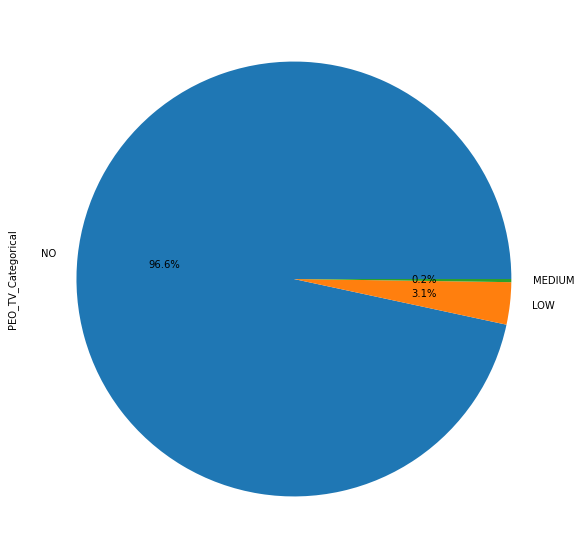

In [81]:
cluster_0["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

In [82]:
#### PeoTV Usage among Triple Play users in Cluster 0

<AxesSubplot:ylabel='PEO_TV_Categorical'>

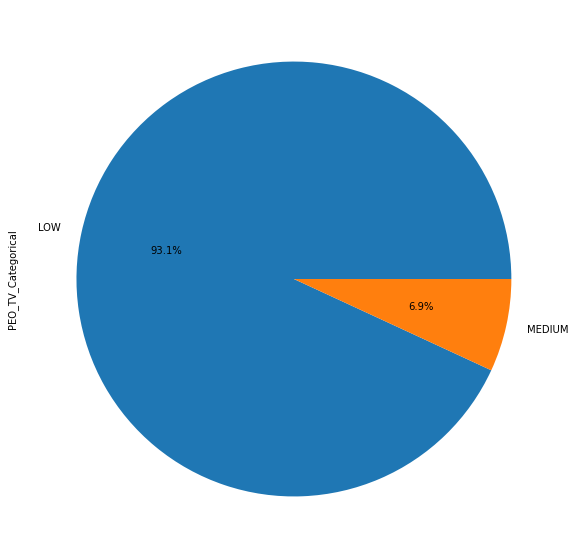

In [83]:
cluster_0_peo = cluster_0[(cluster_0["Play_Type"] == "TRIPLE_PLAY")]
cluster_0_peo["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

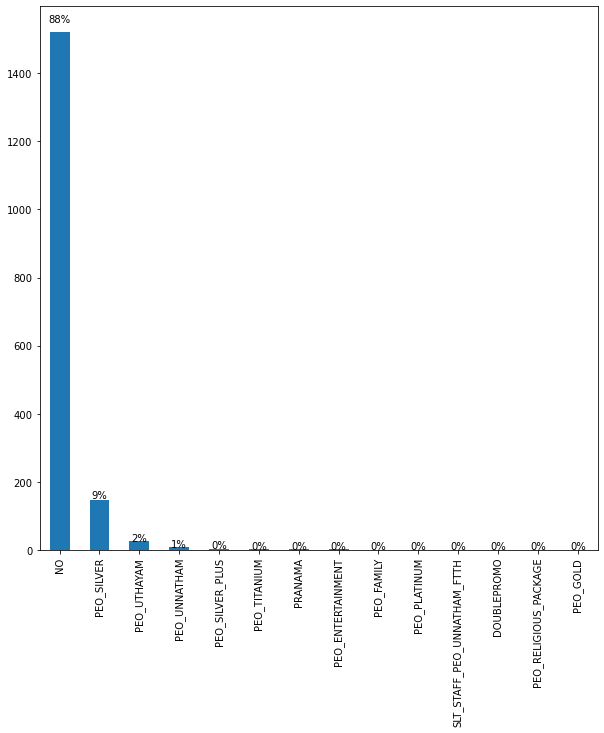

In [84]:
ax =cluster_0["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### BroadBand Internet Usage

In [85]:
cluster_0["BB_Categorical"].value_counts()

NO        1663
LOW         55
MEDIUM       3
Name: BB_Categorical, dtype: int64

#### BB Usage for all users in cluster 1

<AxesSubplot:ylabel='BB_Categorical'>

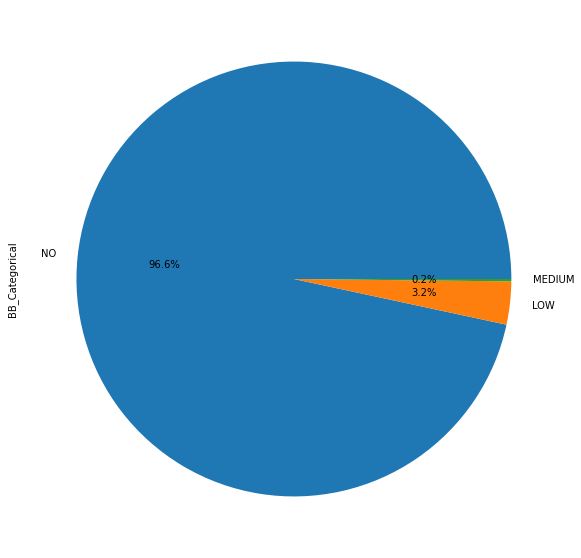

In [86]:
cluster_0["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

#### BB Usage for triple Play users in Cluster 0

<AxesSubplot:ylabel='BB_Categorical'>

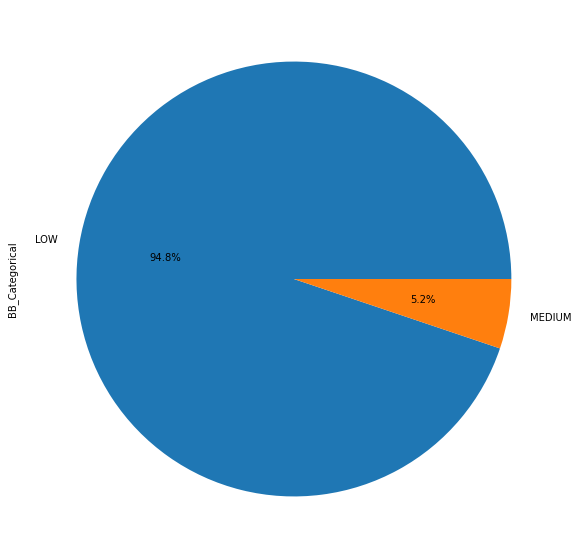

In [87]:
cluster_0_bb = cluster_0[(cluster_0["Play_Type"] == "TRIPLE_PLAY")]
cluster_0_bb["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

### Socio-economic factors

In [88]:
cluster_0["Household_Types"].value_counts()

NO                          1684
['Family_Member_Abroad']      37
Name: Household_Types, dtype: int64

<AxesSubplot:ylabel='Household_Types'>

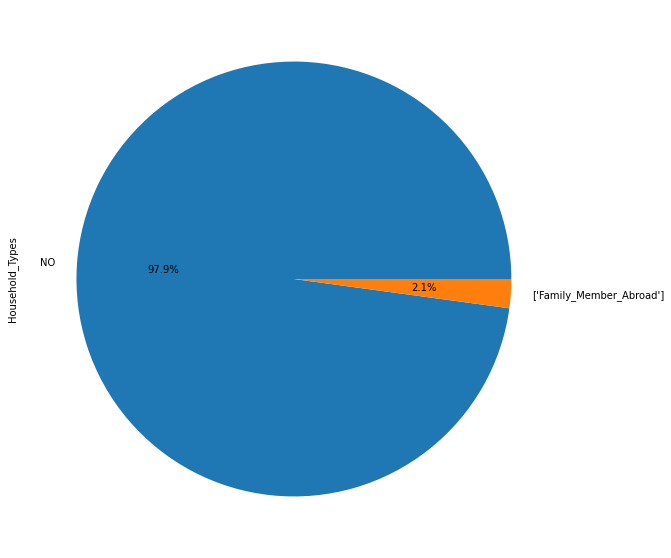

In [89]:
cluster_0["Household_Types"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

In [90]:
cluster_0["Having_Insurance"].value_counts()

NO     1720
YES       1
Name: Having_Insurance, dtype: int64

## Cluster 0 - Findings

- Subscription: Signle Play (But having 60 Triple Play customers as well?)
- Subscription Usage: 
  - Voice: low Usage | **68% L** | **28% M* | **4% H**
  - BB (Overall): Very low usage | **3% Low** | **97% NO**
  - BB (Usage among Triple Play cusomers): Very Low | **95% L** | **5% M**
  - PeoTV (Overall): Very low usage | **3% L** | **97% NO**
  - PeoTV (Usage among Triple Play cusomers): Very Low | **96.7% L** | **3.3% M**
  - Triple Play Users have **very low** use of BB and PeoTV (Maybe thats why they are in this cluster?)
- IDD Usage: Low | **61% NO** | **34% LOW**
- Mostly Used Voice package - V_Call Forwarding (4%)
- Mostly used PeoTV package (among Triple Play users) - Peo Silver (83%)
- Household : Mostly No information found **97%** |  some households have family members abroad **2%**
- Only 1 User having Insurrance Coverage. This cannot be commented as we only have 2 users for whole dataset having an insurrance

# Cluster analysis - Cluster 1

In [91]:
cluster_1 = user_profile[(user_profile["Cluster"]==1)]

In [92]:
cluster_1.describe()

,ONNET_OUTGOING_Scaled,ONNET_INCOMING_Scaled,OFFNET_OUTGOING_Scaled,OFFNET_INCOMING_Scaled,IDD_INCOMING_Scaled,IDD_OUTGOING_Scaled,PEO_TV_Scaled,BB_Scaled,Cluster
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.0
mean,0.101772,0.098437,0.106371,0.114133,0.037010,0.017400,0.747861,0.406445,1.0
std,0.091440,0.093265,0.101327,0.093224,0.111117,0.080858,0.188249,0.251168,0.0
min,0.001202,0.000000,0.000000,0.000000,0.000000,0.000000,0.093750,0.005208,1.0
25%,0.027522,0.020948,0.026810,0.036270,0.000000,0.000000,0.618750,0.201389,1.0
50%,0.079548,0.063874,0.078493,0.101526,0.000000,0.000000,0.775000,0.364583,1.0
75%,0.152914,0.157795,0.157452,0.166331,0.012821,0.000000,0.918750,0.578125,1.0
max,0.521929,0.540865,0.667092,0.712569,0.807692,0.833333,0.975000,1.000000,1.0


<AxesSubplot:>

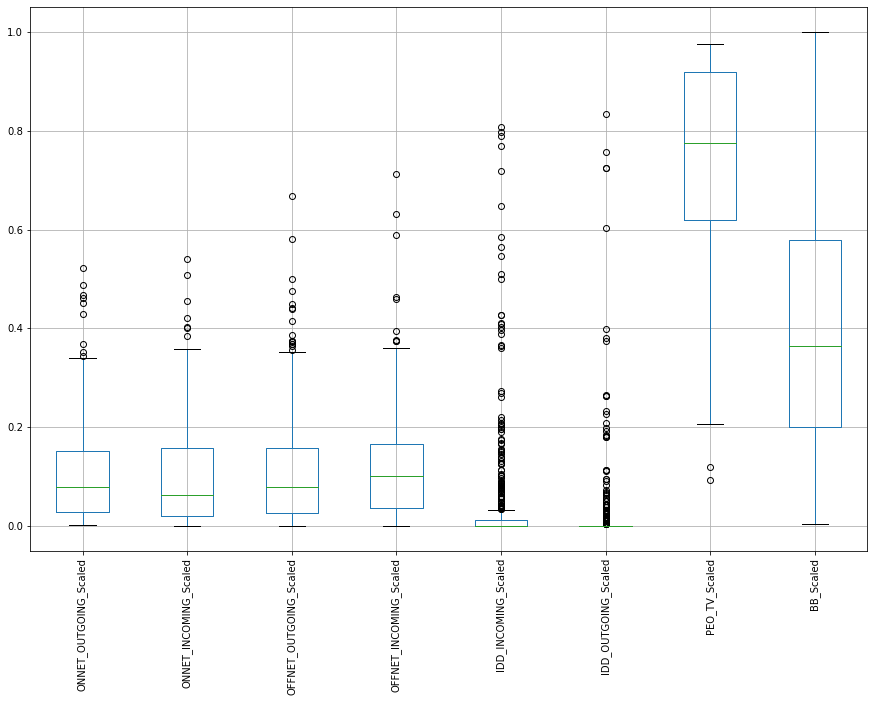

In [93]:
cluster_1.iloc[:,:34].boxplot(figsize=(15,10),rot=90)

### Usage among selected sample of users

<AxesSubplot:>

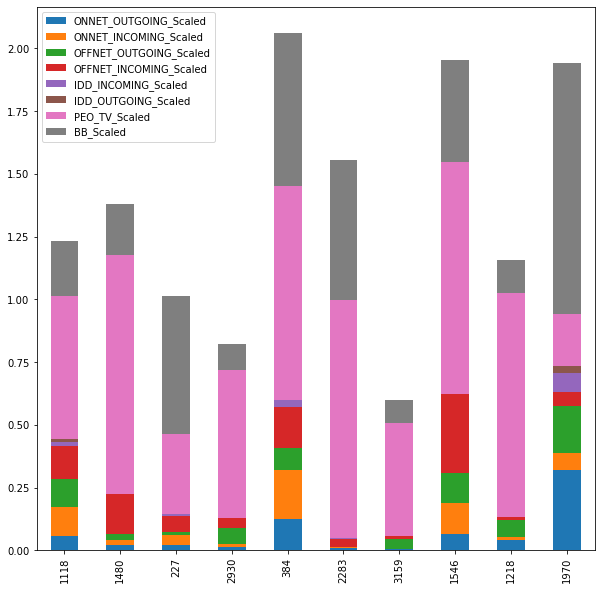

In [94]:
cluster_1.iloc[:,[2,5,8,11,14,17,21,23]].sample(n=10).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:ylabel='Density'>

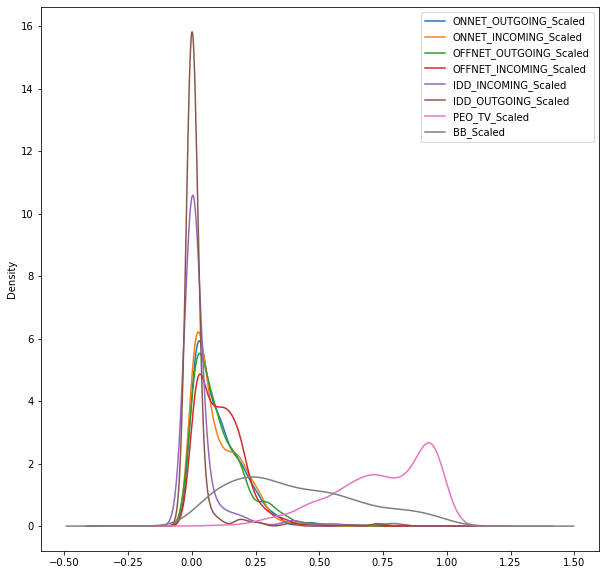

In [95]:
cluster_1.iloc[:,[2,5,8,11,14,17,21,23]].plot.kde(figsize=(10,10))

array([[<AxesSubplot:title={'center':'ONNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_OUTGOING_Scaled'}>],
       [<AxesSubplot:title={'center':'OFFNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_OUTGOING_Scaled'}>],
       [<AxesSubplot:title={'center':'PEO_TV_Scaled'}>,
        <AxesSubplot:title={'center':'BB_Scaled'}>, <AxesSubplot:>]],
      dtype=object)

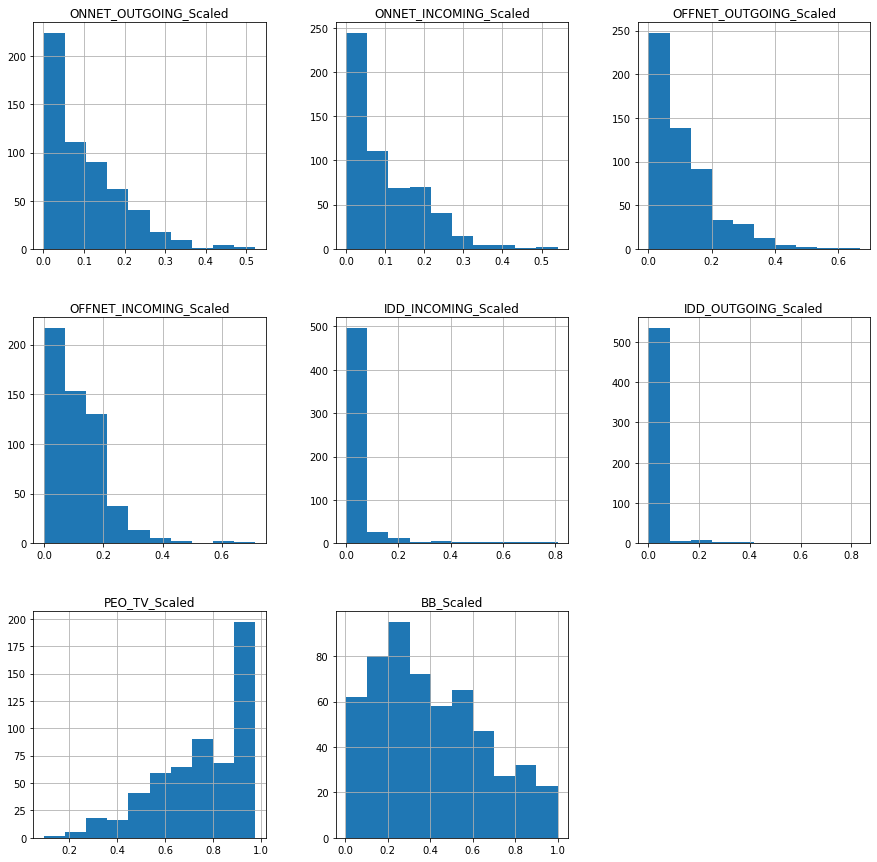

In [96]:
cluster_1.iloc[:,:34].hist(figsize=(15,15))

### Subscription Type and Usage

In [97]:
cluster_1["Play_Type"].value_counts()

TRIPLE_PLAY    561
Name: Play_Type, dtype: int64

In [98]:
cluster_1["Play_Usage"].value_counts()

['VOICE_LOW', 'BB_LOW', 'TV_HIGH']            95
['VOICE_LOW', 'BB_MEDIUM', 'TV_HIGH']         81
['VOICE_MEDIUM', 'BB_MEDIUM', 'TV_HIGH']      70
['VOICE_MEDIUM', 'BB_LOW', 'TV_HIGH']         63
['VOICE_LOW', 'BB_LOW', 'TV_MEDIUM']          60
['VOICE_LOW', 'BB_HIGH', 'TV_HIGH']           38
['VOICE_MEDIUM', 'BB_LOW', 'TV_MEDIUM']       30
['VOICE_MEDIUM', 'BB_HIGH', 'TV_HIGH']        27
['VOICE_LOW', 'BB_MEDIUM', 'TV_MEDIUM']       24
['VOICE_MEDIUM', 'BB_MEDIUM', 'TV_MEDIUM']    18
['VOICE_LOW', 'BB_HIGH', 'TV_MEDIUM']         17
['VOICE_MEDIUM', 'BB_HIGH', 'TV_MEDIUM']      10
['VOICE_HIGH', 'BB_LOW', 'TV_HIGH']            6
['VOICE_LOW', 'BB_HIGH', 'TV_LOW']             5
['VOICE_LOW', 'BB_MEDIUM', 'TV_LOW']           3
['VOICE_MEDIUM', 'BB_MEDIUM', 'TV_LOW']        3
['VOICE_HIGH', 'BB_MEDIUM', 'TV_HIGH']         3
['VOICE_HIGH', 'BB_LOW', 'TV_MEDIUM']          2
['VOICE_HIGH', 'BB_HIGH', 'TV_HIGH']           2
['VOICE_HIGH', 'BB_HIGH', 'TV_LOW']            2
['VOICE_LOW', 'BB_LO

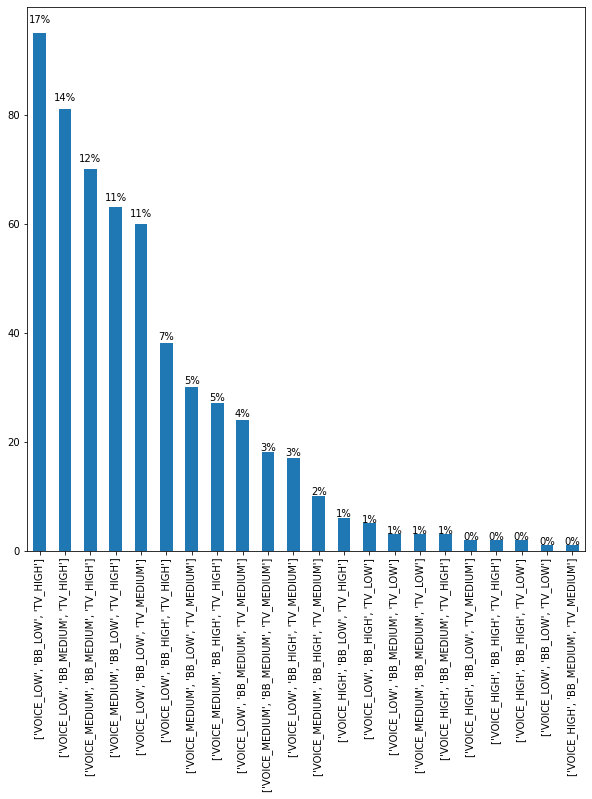

In [99]:
ax =cluster_1["Play_Usage"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Voice Calls Usage

In [100]:
cluster_1["VOICE_Categorical"].value_counts()

LOW       324
MEDIUM    221
HIGH       16
Name: VOICE_Categorical, dtype: int64

<AxesSubplot:ylabel='VOICE_Categorical'>

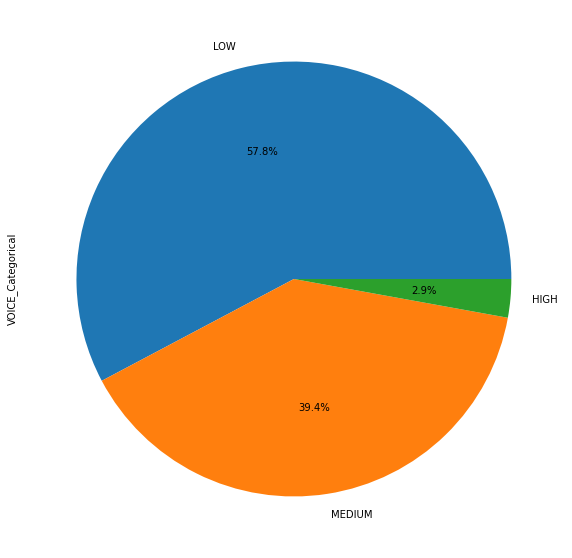

In [101]:
cluster_1["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

In [102]:
count_dict = dict(cluster_1["Voice_Packages"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
    else:
        for i in range(y):
            all_products.append(x)
all_voice_products_dict = Counter(all_products)
all_voice_products_dict

Counter({'NO': 500,
         'V_Basic Phone Installment': 6,
         'V_Absentee service': 29,
         'V_Abbreviated Dialing': 28,
         'V_Call Transfer Three way': 35,
         'V_Call Forwarding': 35,
         'V_Call Waiting': 28,
         'V_Call Forwarding-Immediate': 29,
         'V_Call Forwarding-On Busy': 29,
         'V_Call Forwarding-No Answer': 29,
         'V_Hotline Service': 19,
         'V_Hotline-Time Delayed': 14,
         'V_Cordeless Phone - Installment': 4,
         'V_IDD': 8,
         'V_DQ Contact Details': 7,
         'V_SLT Voice Service': 2,
         'V_SLT CLI': 5,
         'V_Hotline-Immediate': 7,
         'V_Call park': 12,
         'V_Call back on busy': 12,
         'V_Call holding': 15,
         'V_Outgoing Call Memory': 15,
         'V_CLI presentation in call waiting': 12,
         'V_Call Forwarding by time': 15,
         'V_Anonymous call barring': 11,
         'V_Incoming Call Transfer': 14,
         'V_Call Forwarding Offline': 15,
      

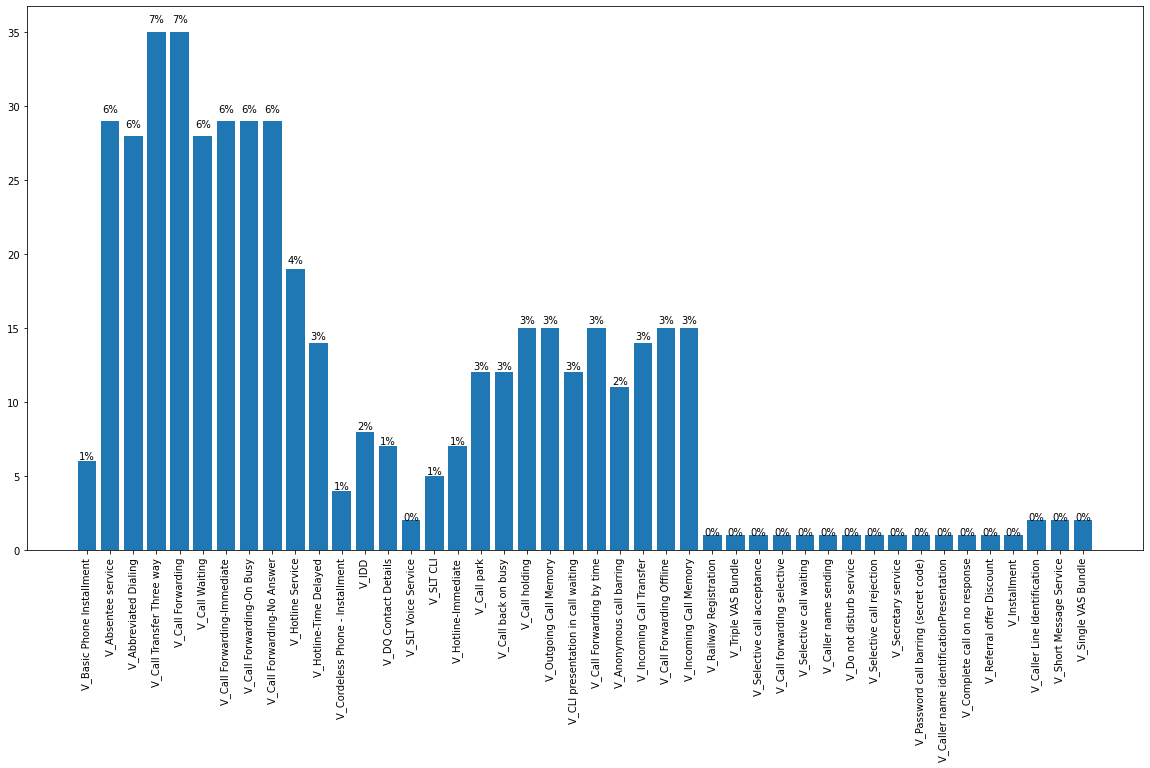

In [103]:
avp_without_no = all_voice_products_dict
avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [104]:
cluster_1["IDD_Overall_Categorical"].value_counts()

NO        333
LOW       204
HIGH       15
MEDIUM      9
Name: IDD_Overall_Categorical, dtype: int64

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

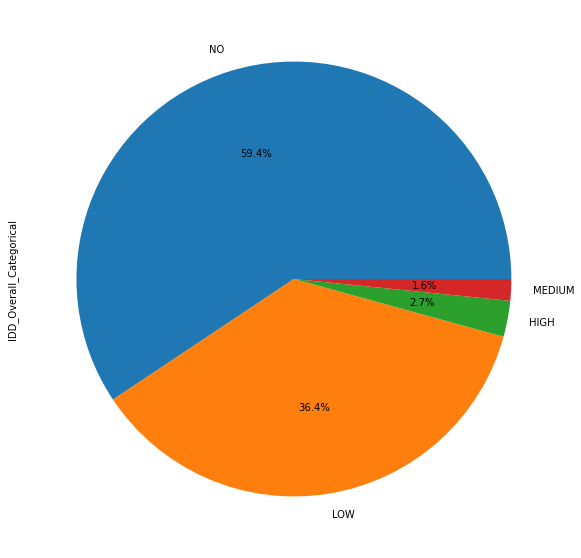

In [105]:
cluster_1["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

### PeoTV Usage

In [106]:
cluster_1["PEO_TV_Categorical"].value_counts()

HIGH      385
MEDIUM    162
LOW        14
Name: PEO_TV_Categorical, dtype: int64

<AxesSubplot:ylabel='PEO_TV_Categorical'>

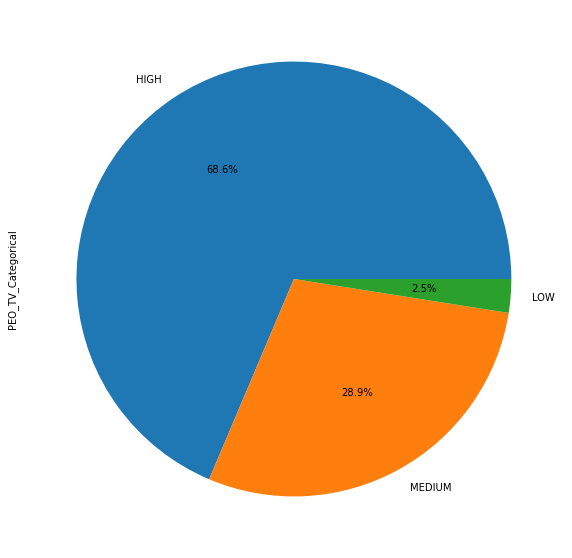

In [107]:
cluster_1["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

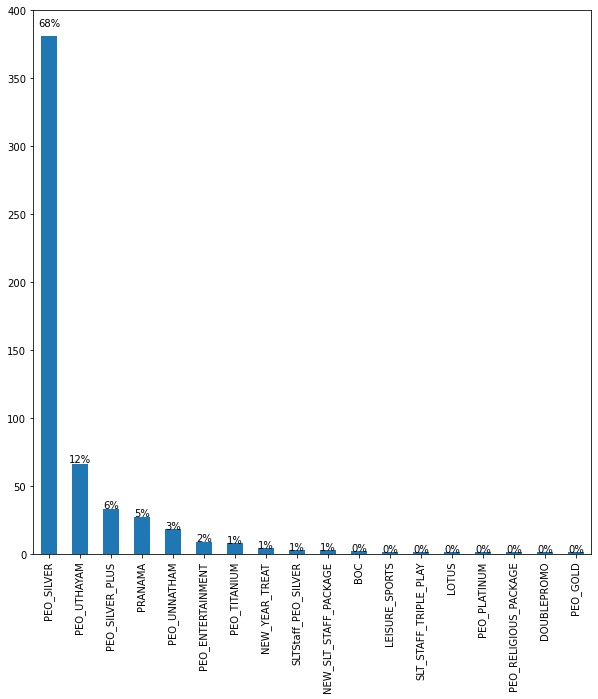

In [108]:
ax =cluster_1_peo["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### BroadBand Internet Usage

In [109]:
cluster_1["BB_Categorical"].value_counts()

LOW       257
MEDIUM    203
HIGH      101
Name: BB_Categorical, dtype: int64

<AxesSubplot:ylabel='BB_Categorical'>

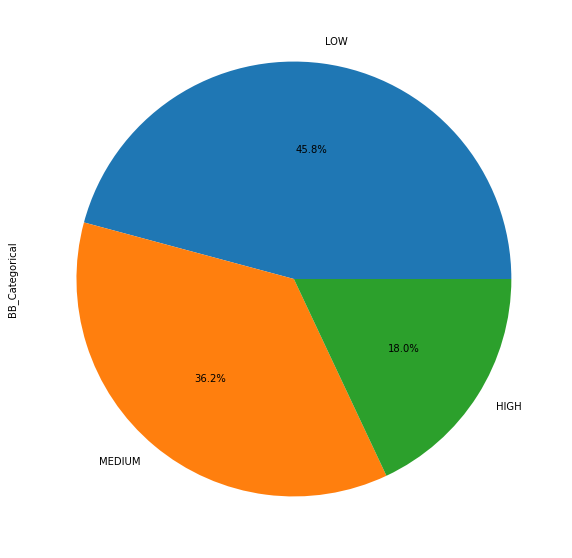

In [110]:
cluster_1["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

### Socio-economic factors

In [111]:
cluster_1["Household_Types"].value_counts()

['Kids']                                                       301
NO                                                             140
['Kids', 'Professional_or_Student']                             62
['Professional_or_Student']                                     33
['Kids', 'Family_Member_Abroad']                                 8
['Senior_Citizen', 'Kids']                                       8
['Kids', 'Professional_or_Student', 'Family_Member_Abroad']      3
['Senior_Citizen', 'Kids', 'Professional_or_Student']            2
['Family_Member_Abroad']                                         2
['Senior_Citizen', 'Kids', 'Family_Member_Abroad']               1
['Professional_or_Student', 'Family_Member_Abroad']              1
Name: Household_Types, dtype: int64

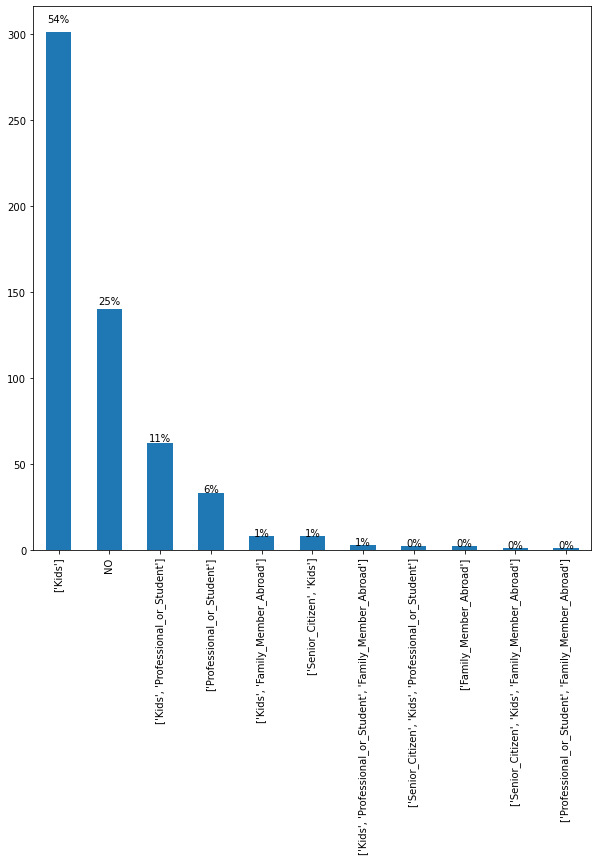

In [112]:
ax = cluster_1["Household_Types"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()
    
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [113]:
cluster_1["Having_Insurance"].value_counts()

NO    561
Name: Having_Insurance, dtype: int64

## Cluster 1 - Findings

- Subscription: Triple Play
- Subscription Usage: 
  - Peo TV **High** usage | **H 67%** | **M 28%** | **L 5%**
  - BB **Medium** usage | **H 18%** | **M 36%** | **L 45%**
  - VOICE **Low** usage | **H 3%** | **M 39%** | **L 57%**
- IDD Usage: Very low  | **No usage 59%** | **Low Usage 36%**
- Mostly used Voice package - **V_Call Transfer Three way** and **V_Call Forwarding** (4%)
- Mostly used PeoTV package - Peo_Silver (68%)
- Household : Mostly Kids, Some probability of having Working Professional or Students, No Senior Citizens or Abroad Familiy Members
- No Insurrance Coverage

# Cluster analysis - Cluster 2

In [114]:
cluster_2 = user_profile[(user_profile["Cluster"]==2)]

In [115]:
cluster_2.describe()

,ONNET_OUTGOING_Scaled,ONNET_INCOMING_Scaled,OFFNET_OUTGOING_Scaled,OFFNET_INCOMING_Scaled,IDD_INCOMING_Scaled,IDD_OUTGOING_Scaled,PEO_TV_Scaled,BB_Scaled,Cluster
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.0
mean,0.100434,0.098378,0.104891,0.102195,0.036332,0.013907,0.245049,0.197636,2.0
std,0.104874,0.106129,0.113736,0.094631,0.104220,0.061302,0.338322,0.260511,0.0
min,0.001202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,0.019304,0.015968,0.020801,0.026213,0.000000,0.000000,0.000000,0.000000,2.0
50%,0.063825,0.061985,0.068779,0.081019,0.000000,0.000000,0.000000,0.081597,2.0
75%,0.156937,0.151957,0.147346,0.149088,0.014423,0.000000,0.575000,0.307292,2.0
max,0.795894,0.742788,0.705357,0.640453,0.884615,0.785256,0.950000,1.000000,2.0


<AxesSubplot:>

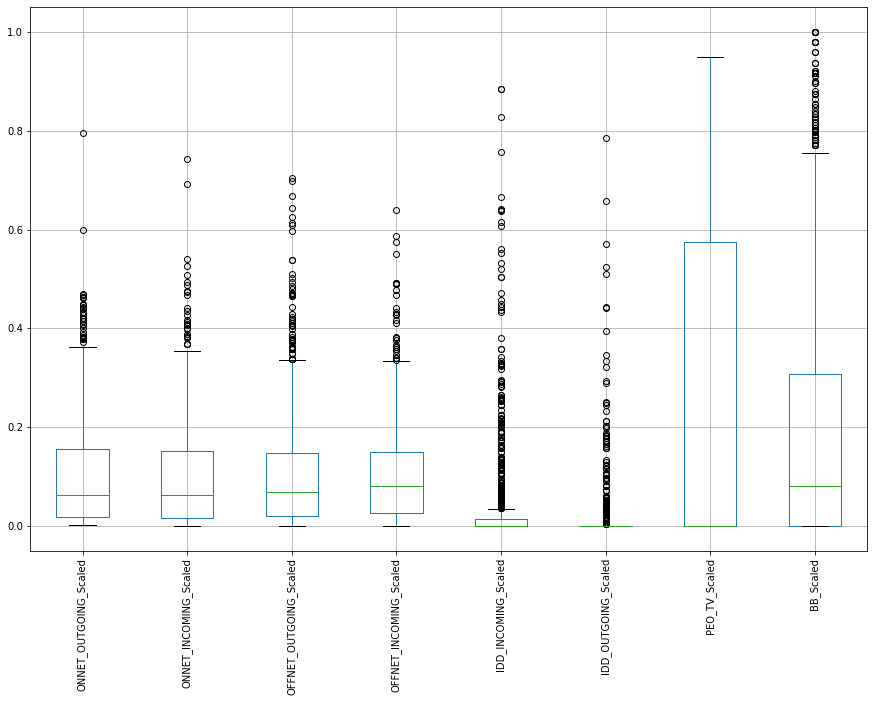

In [116]:
cluster_2.iloc[:,:34].boxplot(figsize=(15,10),rot=90)

#### Usage among sample of users

<AxesSubplot:>

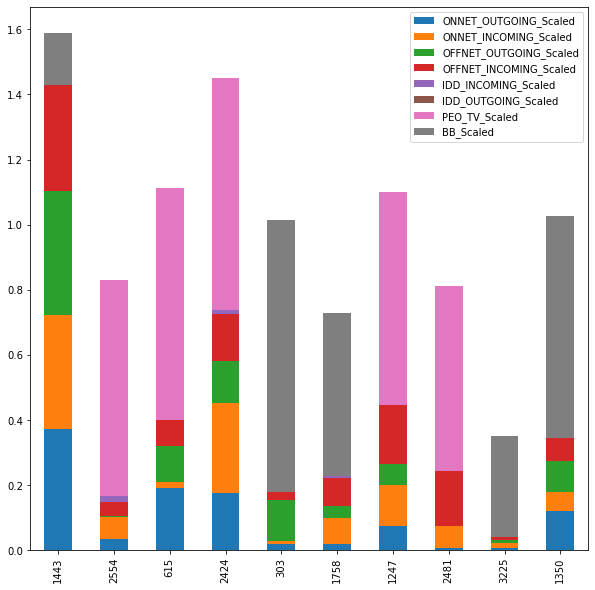

In [117]:
cluster_2.iloc[:,[2,5,8,11,14,17,21,23]].sample(n=10).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:ylabel='Density'>

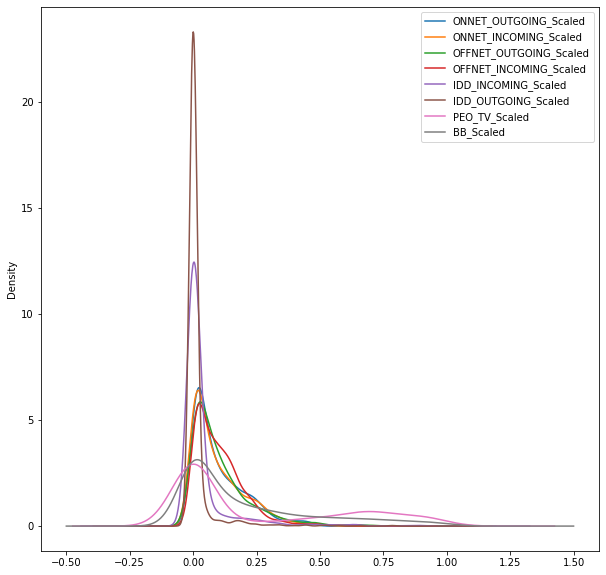

In [118]:
cluster_2.iloc[:,[2,5,8,11,14,17,21,23]].plot.kde(figsize=(10,10))

array([[<AxesSubplot:title={'center':'ONNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_OUTGOING_Scaled'}>],
       [<AxesSubplot:title={'center':'OFFNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_OUTGOING_Scaled'}>],
       [<AxesSubplot:title={'center':'PEO_TV_Scaled'}>,
        <AxesSubplot:title={'center':'BB_Scaled'}>, <AxesSubplot:>]],
      dtype=object)

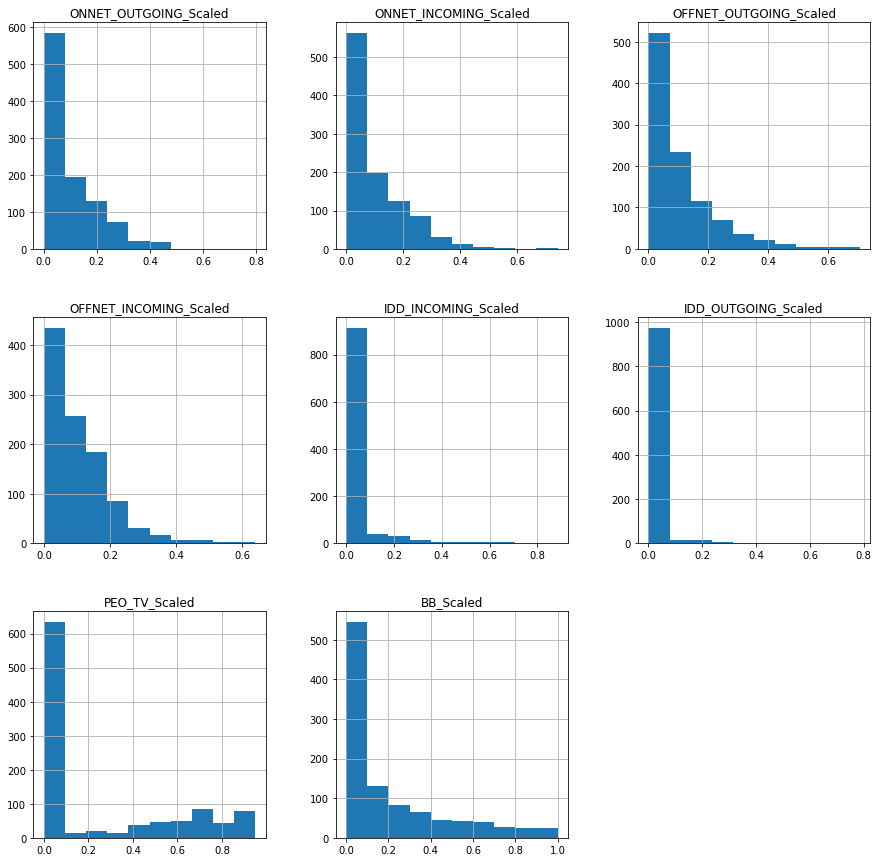

In [119]:
cluster_2.iloc[:,:34].hist(figsize=(15,15))

### Subscription Type and Usage

In [120]:
cluster_2["Play_Type"].value_counts()

DOUBLE_PLAY    1025
Name: Play_Type, dtype: int64

In [121]:
cluster_2["Play_Usage"].value_counts()

['VOICE_LOW', 'BB_LOW', 'TV_NO']          242
['VOICE_LOW', 'BB_NO', 'TV_HIGH']         131
['VOICE_MEDIUM', 'BB_LOW', 'TV_NO']       122
['VOICE_LOW', 'BB_MEDIUM', 'TV_NO']       101
['VOICE_LOW', 'BB_NO', 'TV_MEDIUM']        80
['VOICE_MEDIUM', 'BB_NO', 'TV_HIGH']       76
['VOICE_LOW', 'BB_HIGH', 'TV_NO']          66
['VOICE_MEDIUM', 'BB_NO', 'TV_MEDIUM']     52
['VOICE_LOW', 'BB_NO', 'TV_LOW']           42
['VOICE_MEDIUM', 'BB_MEDIUM', 'TV_NO']     38
['VOICE_MEDIUM', 'BB_HIGH', 'TV_NO']       25
['VOICE_HIGH', 'BB_LOW', 'TV_NO']          16
['VOICE_MEDIUM', 'BB_NO', 'TV_LOW']        13
['VOICE_HIGH', 'BB_MEDIUM', 'TV_NO']        7
['VOICE_HIGH', 'BB_NO', 'TV_HIGH']          4
['VOICE_HIGH', 'BB_HIGH', 'TV_NO']          4
['VOICE_HIGH', 'BB_NO', 'TV_LOW']           3
['VOICE_HIGH', 'BB_NO', 'TV_MEDIUM']        3
Name: Play_Usage, dtype: int64

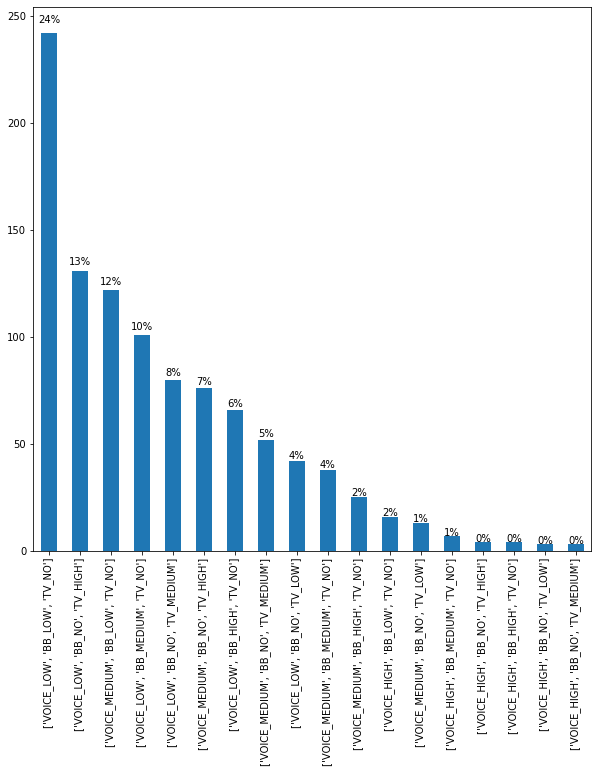

In [122]:
ax =cluster_2["Play_Usage"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Double Play categories

{'Double Play(Voice+BB)': 621, 'Double Play(Voice+|PeoTV)': 404}


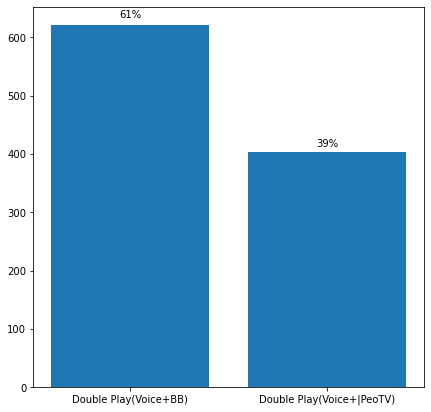

In [123]:
tv_users = cluster_2[(cluster_2["BB_Categorical"] == "NO") & (cluster_2["PEO_TV_Categorical"] != "NO")]["event_source.hash"].count()
bb_users = cluster_2[(cluster_2["BB_Categorical"] != "NO") & (cluster_2["PEO_TV_Categorical"] == "NO")]["event_source.hash"].count()
new_dict= {"Double Play(Voice+BB)": bb_users, "Double Play(Voice+|PeoTV)": tv_users}
print(new_dict)

fig,ax = plt.subplots(figsize=(7,7))
ax.bar(*zip(*new_dict.items()))
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/1025:.0%}', (x + width/2, y + height*1.02), ha='center')
plt.show()

### Voice Calls Usage

In [124]:
cluster_2["VOICE_Categorical"].value_counts()

LOW       662
MEDIUM    326
HIGH       37
Name: VOICE_Categorical, dtype: int64

<AxesSubplot:ylabel='VOICE_Categorical'>

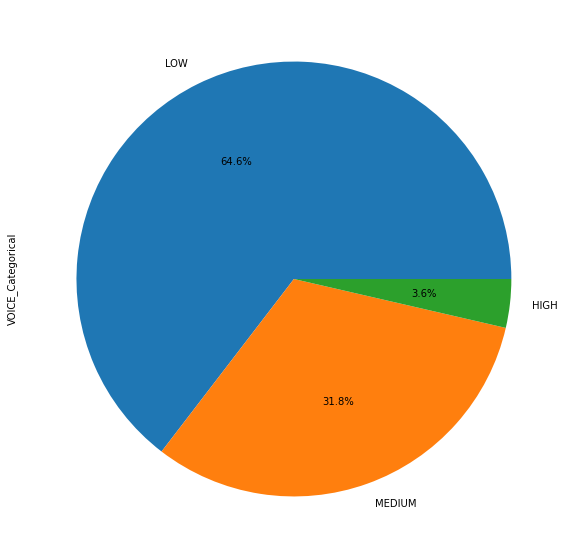

In [125]:
cluster_2["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

In [126]:
count_dict = dict(cluster_2["Voice_Packages"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
    else:
        for i in range(y):
            all_products.append(x)
all_voice_products_dict = Counter(all_products)
all_voice_products_dict

Counter({'NO': 925,
         'V_Absentee service': 51,
         'V_Abbreviated Dialing': 51,
         'V_Call Transfer Three way': 58,
         'V_Call Forwarding': 61,
         'V_Call Waiting': 52,
         'V_Call Forwarding-Immediate': 51,
         'V_Call Forwarding-On Busy': 51,
         'V_Call Forwarding-No Answer': 52,
         'V_Basic Phone Installment': 5,
         'V_IDD': 24,
         'V_Installment': 2,
         'V_DQ Contact Details': 22,
         'V_Cordeless Phone - Installment': 3,
         'V_SLT CLI': 15,
         'V_Hotline Service': 24,
         'V_Hotline-Time Delayed': 17,
         'V_Call holding': 24,
         'V_Incoming Call Transfer': 23,
         'V_Outgoing Call Memory': 25,
         'V_Incoming Call Memory': 25,
         'V_Call Forwarding by time': 24,
         'V_Call Forwarding Offline': 27,
         'V_Caller Line Identification': 3,
         'V_Anonymous call barring': 15,
         'V_Call back on busy': 15,
         'V_Call park': 15,
         'V_

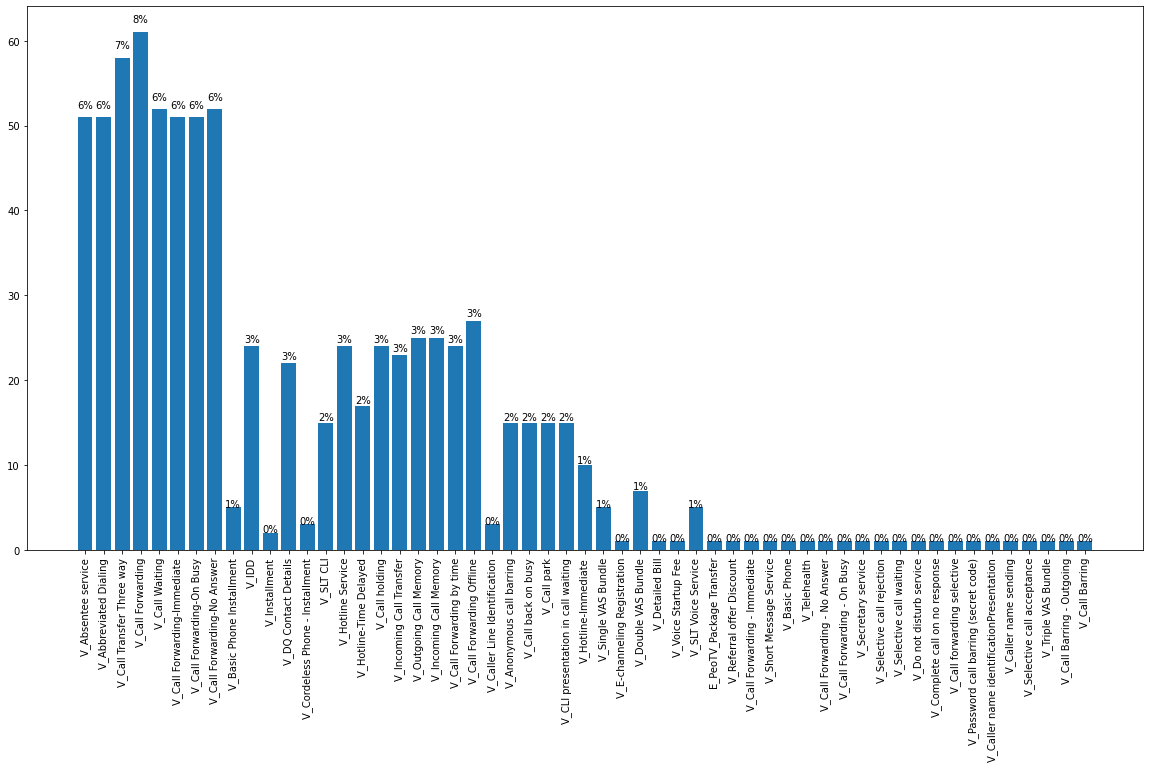

In [127]:
avp_without_no = all_voice_products_dict
avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [128]:
cluster_2["IDD_Overall_Categorical"].value_counts()

NO        625
LOW       352
MEDIUM     35
HIGH       13
Name: IDD_Overall_Categorical, dtype: int64

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

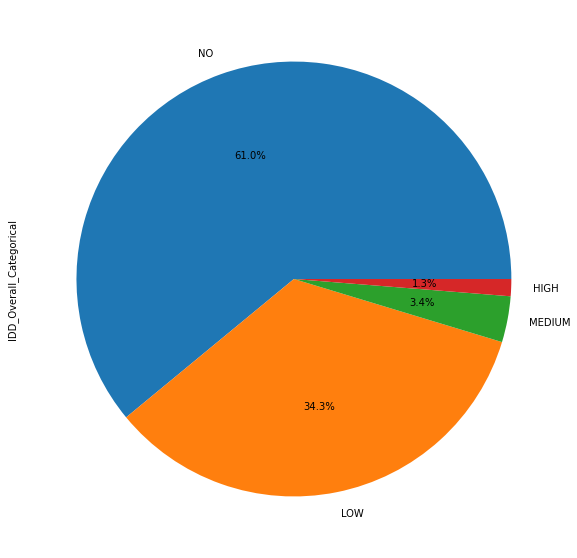

In [129]:
cluster_2["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

### PeoTV Usage

In [130]:
cluster_2["PEO_TV_Categorical"].value_counts()

NO        621
HIGH      211
MEDIUM    135
LOW        58
Name: PEO_TV_Categorical, dtype: int64

#### Usage among All users in cluster

<AxesSubplot:ylabel='PEO_TV_Categorical'>

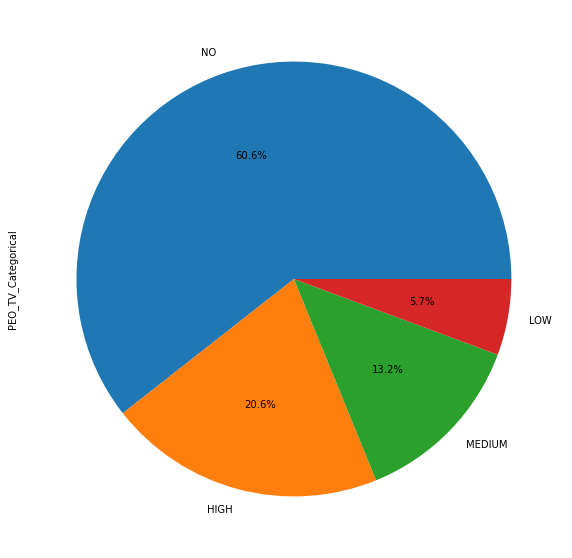

In [131]:
cluster_2["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

#### Usage among VOICE + PeoTV Users

<AxesSubplot:ylabel='PEO_TV_Categorical'>

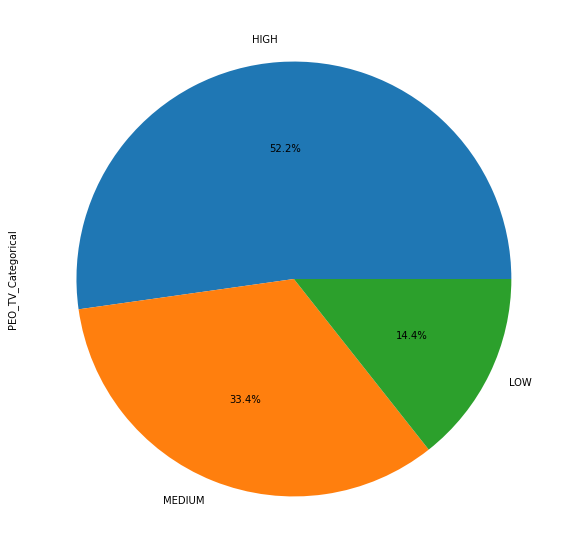

In [132]:
cluster_2_peo = cluster_2[(cluster_2["BB_Categorical"] == "NO") & (cluster_2["PEO_TV_Categorical"] != "NO")]
cluster_2_peo["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

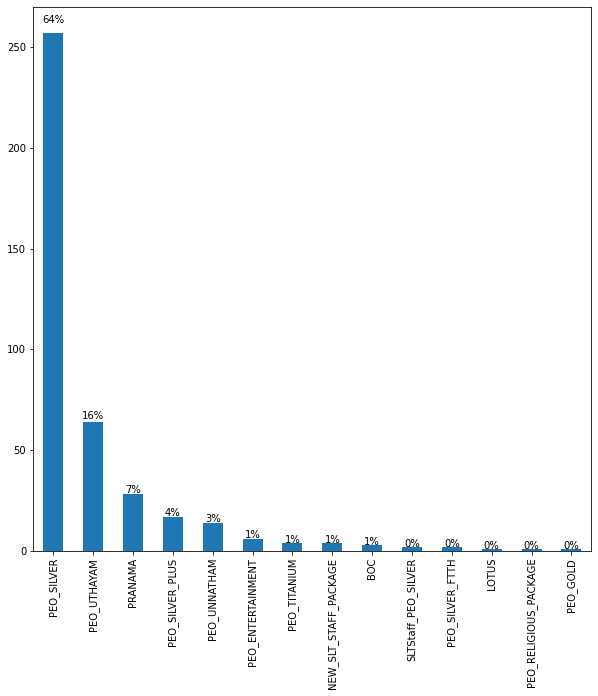

In [133]:
ax =cluster_2_peo["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### BroadBand Internet Usage

In [134]:
cluster_2["BB_Categorical"].value_counts()

NO        404
LOW       380
MEDIUM    146
HIGH       95
Name: BB_Categorical, dtype: int64

#### Usage among All users in cluster

<AxesSubplot:ylabel='BB_Categorical'>

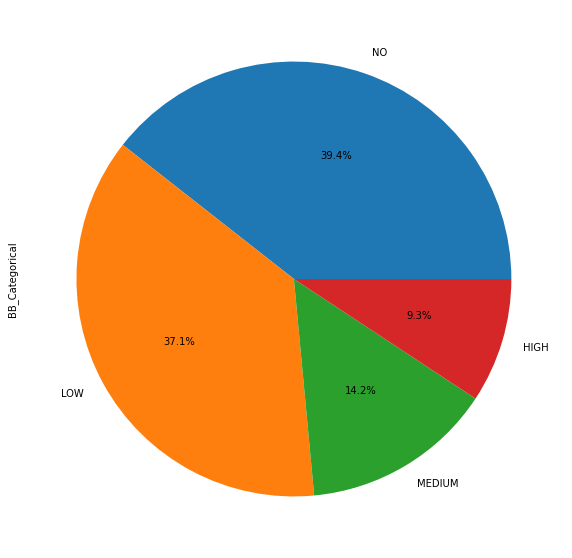

In [135]:
cluster_2["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

#### Usage among Voice + BB Users

<AxesSubplot:ylabel='BB_Categorical'>

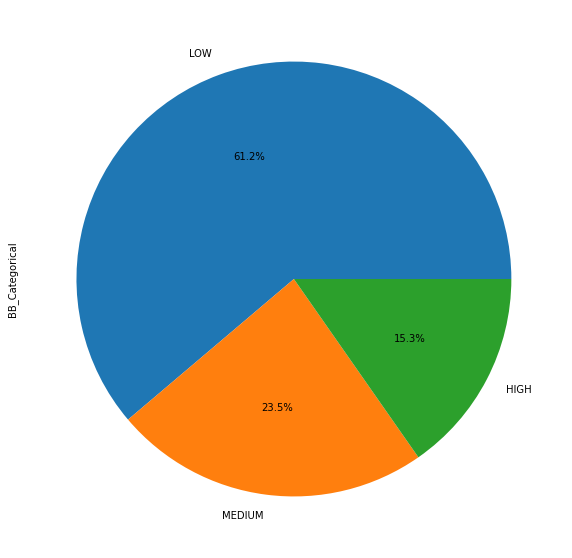

In [136]:
cluster_2_peo = cluster_2[(cluster_2["BB_Categorical"] != "NO") & (cluster_2["PEO_TV_Categorical"] == "NO")]
cluster_2_peo["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

### Socio-economic factors

In [137]:
cluster_2["Household_Types"].value_counts()

NO                                                     709
['Kids']                                               205
['Professional_or_Student']                             94
['Family_Member_Abroad']                                10
['Senior_Citizen', 'Kids']                               4
['Kids', 'Family_Member_Abroad']                         2
['Professional_or_Student', 'Family_Member_Abroad']      1
Name: Household_Types, dtype: int64

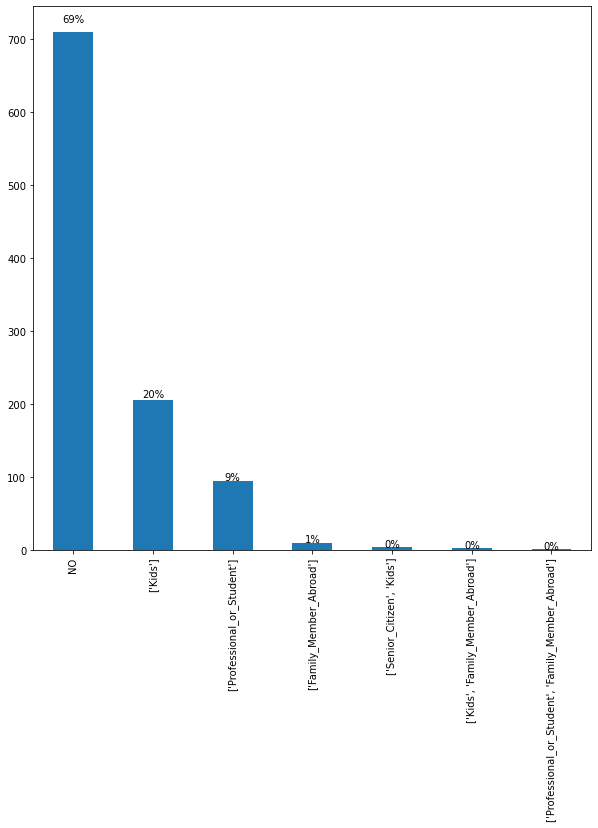

In [138]:
ax = cluster_2["Household_Types"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()
    
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [139]:
cluster_2["Having_Insurance"].value_counts()

NO     1024
YES       1
Name: Having_Insurance, dtype: int64

## Cluster 2 - Findings

- Subscription: Double Play (Voice + BB, Voice + PeoTV)
- Subscripotion Types:
  - Voice + BB Highest | **61%**
  - Voice + PeoTV Lowest | **39%**
- Subscription Usage: 
  - Voice: **Low** | **64% L** | **31% M** | **3.6% H**
  - BB (Among Voice+BB Users): Low usage | **61% L** | **23% M** | **15% H**
  - PeoTV (Among Voice+peoTV Users): High usage | **61% H** | **23% M** | **14% L**
- IDD Usage: Very Low | **61% NO** | **34% LOW**
- Mostly Used Voice package - V_Call Forwarding (4%)
- Mostly used PeoTV Package (Among Voice + PeoTV Subscribers) - Peo_Sliver (64%)
- Household : Mostly No information found **65%** | some have kids **24%** | some have professions or students **9**
- Only 1 User having Insurrance Coverage. This cannot be commented as we only have 2 users for whole dataset having an insurrance